In [129]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

# Visualize Data

In [130]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [131]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [132]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

# Remove rows with no Respondent ID

In [133]:
star_wars = star_wars.loc[pd.notnull(star_wars['RespondentID'])]

# Convert Columns 1 and 2 to Boolean
## Have you seen any of the 6 films in the Star Wars franchise?
## Do you consider yourself to be a fan of the Star Wars film franchise?

In [134]:
# Create a mapping of 'Yes': True, 'No': False
yes_no = {
    'Yes': True,
    'No': False
}

# Convert columns 1 and 2 to boolean
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


# Convert Columns 3-8 to Boolean
## For each Star Wars movie (Episode I - VI) indicate whether the movie has been seen

In [135]:
# Get column names
cols = star_wars.columns[3:9]
col_rename_map = {}

# Map former column names to new names ('seen_{episode number})
episode = 1
for col in cols:
    col_rename_map[col] = 'seen_' + str(episode)
    episode += 1

star_wars = star_wars.rename(col_rename_map, axis=1)
movie_cols = star_wars.columns[3:9]

In [136]:
# Print values from each movie column to use in mapping
for col in movie_cols:
    print(star_wars[col].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: seen_1, dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: seen_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: seen_6, dtype: int64


In [137]:
# import Numpy
import numpy as np

# Create map for values from Movie Name: True or NaN: False
movie_mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

# Map values for dataframe containing movie columns
for col in movie_cols:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
star_wars[movie_cols].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


# Convert Columns 9-14 to Float
## Rank the 6 movies in order of preference

In [138]:
movie_pref = star_wars.columns[9:15]
star_wars[movie_pref] = star_wars[movie_pref].astype(float)

In [139]:
# Create mapping for renaming movie_pref columns to 'ranking_{episode}'
movie_pref_rename_map = {}
episode = 1
for movie in movie_pref:
    movie_pref_rename_map[movie] = 'ranking_' + str(episode)
    episode += 1
    
# rename columns
star_wars = star_wars.rename(movie_pref_rename_map, axis = 1)

# Compare rankings for each of the 6 movies

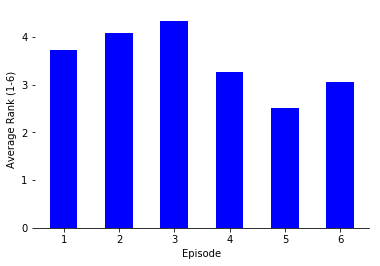

In [140]:
# find the mean of each column
movie_pref = star_wars.columns[9:15]
ranking_means = star_wars[movie_pref].mean()

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
width = 0.5
ind = np.arange(len(ranking_means))
ax.bar(ind, ranking_means, width, color='blue')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Rank (1-6)')
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


# ranking_means.plot(kind='bar')

## Thus far we've cleaned column names to aid in simplicity and we've converted value types from strings to bools and floats. Specifically, for questions asking if respondents have seen the Star Wars movies and whether or not they are fans of the franchise, we've simplified the column data into True, False, or NaN. For questions asking respondents to rank the movies in order of preference, we've converted the values to float so that we can perform analyses.

## In the graph above we've charted the average rank each of the Episodes received from respondents. The clear winner is Episode 5, being the only movie to have an average rank above 3. Episode 3, the last movie made of the original 6 was, on average, the least favorite, with an average ranking below 4. 

# Compare viewing frequency of each movie

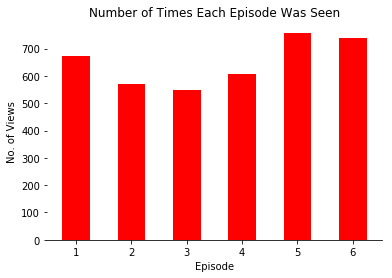

In [141]:
# assign seen_{episode} columns to variable to explore the sum of each
movie_cols = star_wars.columns[3:9]
seen_sums = star_wars[movie_cols].sum()

# Plot the results
fix, ax = plt.subplots()
ind = np.arange(len(movie_cols))
width = 0.5
ax.bar(ind, seen_sums, width, color='r')
plt.title('Number of Times Each Episode Was Seen')
plt.xlabel('Episode')
plt.ylabel('No. of Views')
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


## Displaying the view count for each movie gives us some insight into the rankings. We cannot be sure of the causation or correlation yet, but Episode 5 has both the most views and the highest average rank, wheras Episode 3 has both the least views and lowest average rank. Perhaps more people have seen Episode 5 due to its popularity, but perhaps the high ranking comes from the larger population of viewers. 

# Compare responses for different age groups

In [142]:
# View Age column data
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [143]:
# Separate respondents into two groups young and old based on their age
# 18-44 in young
# 45+ in old
young_star_wars = star_wars[(star_wars['Age'] == '18-29') | (star_wars['Age'] == '30-44')]
old_star_wars = star_wars[(star_wars['Age'] == '45-60') | (star_wars['Age'] == '> 60')]
print(len(young_star_wars))
print(len(old_star_wars))

486
560


In [152]:
# Calculate view counts for each movie in age groups
# movie_cols contains the relevant columns
young_view_sums = young_star_wars[movie_cols].sum()
old_view_sums = old_star_wars[movie_cols].sum()

# Calculate average rank for each movie in age groups
# movie_pref contains the relevant columns
young_ave_rank = young_star_wars[movie_pref].mean()
old_ave_rank = old_star_wars[movie_pref].mean()

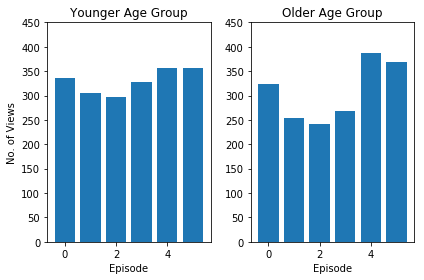

In [147]:
# Plot the results
plt.subplot(1, 2, 1)
plt.bar(ind, young_view_sums)
plt.ylim(0, 450)
plt.xlabel('Episode')
plt.ylabel('No. of Views')
# ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6])
plt.title('Younger Age Group')

plt.subplot(1, 2, 2)
plt.bar(ind, old_view_sums)
plt.ylim(0, 450)
plt.xlabel('Episode')
plt.title('Older Age Group')

plt.tight_layout()

## We can see more extreme values in the Older age group when compared to the Younger age group. Those in the older age group are more likely to have seen Episodes 5 and 6, which is to be expected considering their release dates in the 1980s. They're also less likely to have seen any of the 3 newer movies. Episode 1-3

Text(0.5,1,'Average Movie Rank, Younger Generation')

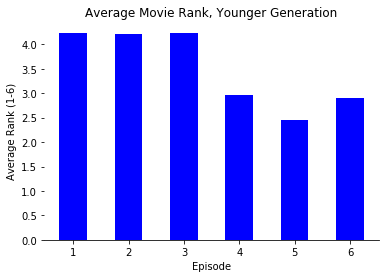

In [161]:
fig, ax = plt.subplots()
width = 0.5
ind = np.arange(len(old_ave_rank))

ax.bar(ind, young_ave_rank, width, color='blue')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Rank (1-6)')
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Average Movie Rank, Younger Generation')

fig, ax = plt.subplots()
ax.bar(ind, old_ave_rank, width, color='blue')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Rank (1-6)')
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Average Movie Rank, Older Generation')

## We can see from these graphs that the average movie rank for each episode follows the same general trend, with Episodes 1-3 being ranked lower on average than Episodes 4-6. Both generations ranked Episode 5 highest on average. The main difference between the generations' rankings is that the younger generation ranked Episodes 1-3 about equally whereas the older generation ranked them in descending order (Episode 1 highest, 3 lowest)

# Further analysis on the data set could explore:
## Differences between smaller age groups
## Differences between gender groups
## Difference between fans of the franchise (or Star Trek franchise) and non-fans
## Other analysis as the investigator sees fit